In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install scikit-learn


In [3]:
import pandas as pd
file_path = '/content/drive/MyDrive/BBB dataset/B3DB_regression.tsv'
total = pd.read_csv(file_path, delimiter='\t', encoding='utf-8', on_bad_lines='skip')



In [4]:
total

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,Inchi,reference,group,comments
0,1,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,3889.0|,-2.52,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,R25|,A,NaN
1,2,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,18595497.0|,-2.15,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,R25|,A,NaN
2,3,morphine-6-glucuronide,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-9-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,9847115.0|,-2.09,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-5-13(31-2...,R25|,A,NaN
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,74041479.0|,-1.88,InChI=1S/C21H28BrN5O/c1-14-9-18(22)13-25-19(14...,R35|,A,NaN
4,5,NaN,NaN,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,nan|,-1.82,"InChI=1S/C16H14ClN5O4/c1-16(24,25)15-19-13(20-...",R35|,A,NaN
...,...,...,...,...,...,...,...,...,...,...
1053,1054,2qju,"3-(5,6-dihydrobenzo[b][1]benzazepin-11-yl)prop...",C[NH2+]CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,2995.0|2995.0|2995.0|2995.0|2995.0|2995.0|2995...,1.20,InChI=1S/C18H22N2/c1-19-13-6-14-20-17-9-4-2-7-...,R4|R3|R38|R41|R43|R47|R49|R40|R8|R21|R27|R2|R2...,D,NaN
1054,1055,promazine,"n,n-dimethyl-3-phenothiazin-10-ylpropan-1-amine",CN(C)CCCN1C2=CC=CC=C2SC3=CC=CC=C31,4926.0|4926.0|4926.0|4926.0|4926.0|4926.0|4926...,1.23,InChI=1S/C17H20N2S/c1-18(2)12-7-13-19-14-8-3-5...,R3|R4|R50|R40|R38|R41|R8|R21|R27|R2|R2|R27|R3|...,D,NaN
1055,1056,diphenhydramine,"2-benzhydryloxy-n,n-dimethylethanamine",CN(C)CCOC(C1=CC=CC=C1)C2=CC=CC=C2,3100.0|3100.0|3100.0|3100.0|3100.0|3100.0|3100...,1.30,InChI=1S/C17H21NO/c1-18(2)13-14-19-17(15-9-5-3...,R42|R2|R2|R3|R8|R18|R21|R25|R26|R27|R27|R27|R3...,D,NaN
1056,1057,1225-64-5,3-(2-chlorophenothiazin-10-yl)-n-methylpropan-...,CNCCCN1C2=CC=CC=C2SC3=C1C=C(C=C3)Cl,62875.0|62875.0|62875.0|62875.0|62875.0|62875....,1.40,InChI=1S/C16H17ClN2S/c1-18-9-4-10-19-13-5-2-3-...,R18|R26|R27|R4|R11|R12|R20|R25|R35|R36|R39|R43...,D,NaN


In [5]:
!pip install rdkit-pypi
!pip install pandas
!pip install Pillow
!pip install matplotlib
!pip install pydot
!sudo apt-get -qq install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 38.9 MB/s eta 0:00:00


In [6]:
import os

# Temporary suppress tf logs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from rdkit import Chem
from rdkit import RDLogger
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage

# Temporary suppress warnings and RDKit logs
warnings.filterwarnings("ignore")
RDLogger.DisableLog("rdApp.*")

np.random.seed(42)
tf.random.set_seed(42)

In [7]:
class Featurizer:
    def __init__(self, allowable_sets):
        self.dim = 0
        self.features_mapping = {}
        for k, s in allowable_sets.items():
            s = sorted(list(s))
            self.features_mapping[k] = dict(zip(s, range(self.dim, len(s) + self.dim)))
            self.dim += len(s)

    def encode(self, inputs):
        output = np.zeros((self.dim,))
        for name_feature, feature_mapping in self.features_mapping.items():
            feature = getattr(self, name_feature)(inputs)
            if feature not in feature_mapping:
                continue
            output[feature_mapping[feature]] = 1.0
        return output


class AtomFeaturizer(Featurizer):
    def __init__(self, allowable_sets):
        super().__init__(allowable_sets)

    def symbol(self, atom):
        return atom.GetSymbol()

    def n_valence(self, atom):
        return atom.GetTotalValence()

    def n_hydrogens(self, atom):
        return atom.GetTotalNumHs()

    def hybridization(self, atom):
        return atom.GetHybridization().name.lower()



class BondFeaturizer(Featurizer):
    def __init__(self, allowable_sets):
        super().__init__(allowable_sets)
        self.dim += 1

    def encode(self, bond):
        output = np.zeros((self.dim,))
        if bond is None:
            output[-1] = 1.0
            return output
        output = super().encode(bond)
        return output

    def bond_type(self, bond):
        return bond.GetBondType().name.lower()

    def conjugated(self, bond):
        return bond.GetIsConjugated()


atom_featurizer = AtomFeaturizer(
    allowable_sets={
        "symbol": {"B", "Br", "C", "Ca", "Cl", "F", "H", "I", "N", "Na", "O", "P", "S"},
        "n_valence": {0, 1, 2, 3, 4, 5, 6},
        "n_hydrogens": {0, 1, 2, 3, 4},
        "hybridization": {"s", "sp", "sp2", "sp3"},
    }
)

bond_featurizer = BondFeaturizer(
    allowable_sets={
        "bond_type": {"single", "double", "triple", "aromatic"},
        "conjugated": {True, False},
    }
)


In [8]:

def molecule_from_smiles(smiles):
    # MolFromSmiles(m, sanitize=True) should be equivalent to
    # MolFromSmiles(m, sanitize=False) -> SanitizeMol(m) -> AssignStereochemistry(m, ...)
    molecule = Chem.MolFromSmiles(smiles, sanitize=False)

    # If sanitization is unsuccessful, catch the error, and try again without
    # the sanitization step that caused the error
    flag = Chem.SanitizeMol(molecule, catchErrors=True)
    if flag != Chem.SanitizeFlags.SANITIZE_NONE:
        Chem.SanitizeMol(molecule, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ flag)

    Chem.AssignStereochemistry(molecule, cleanIt=True, force=True)
    return molecule


def graph_from_molecule(molecule):
    # Initialize graph
    atom_features = []
    bond_features = []
    pair_indices = []

    for atom in molecule.GetAtoms():
        atom_features.append(atom_featurizer.encode(atom))

        # Add self-loops
        pair_indices.append([atom.GetIdx(), atom.GetIdx()])
        bond_features.append(bond_featurizer.encode(None))

        for neighbor in atom.GetNeighbors():
            bond = molecule.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
            pair_indices.append([atom.GetIdx(), neighbor.GetIdx()])
            bond_features.append(bond_featurizer.encode(bond))

    return np.array(atom_features), np.array(bond_features), np.array(pair_indices)


def graphs_from_smiles(smiles_list):
    # Initialize graphs
    atom_features_list = []
    bond_features_list = []
    pair_indices_list = []

    for smiles in smiles_list:
        molecule = molecule_from_smiles(smiles)
        atom_features, bond_features, pair_indices = graph_from_molecule(molecule)

        atom_features_list.append(atom_features)
        bond_features_list.append(bond_features)
        pair_indices_list.append(pair_indices)

    # Convert lists to ragged tensors for tf.data.Dataset later on
    return (
        tf.ragged.constant(atom_features_list, dtype=tf.float32),
        tf.ragged.constant(bond_features_list, dtype=tf.float32),
        tf.ragged.constant(pair_indices_list, dtype=tf.int64),
    )


# Shuffle array of indices ranging from 0 to 2049
permuted_indices = np.random.permutation(np.arange(total.shape[0]))

# Train set: 80 % of data
train_index = permuted_indices[: int(total.shape[0] * 0.8)]
x_train = graphs_from_smiles(total.iloc[train_index].SMILES)
y_train = total.iloc[train_index].logBB

# Valid set: 19 % of data
valid_index = permuted_indices[int(total.shape[0] * 0.8) : int(total.shape[0] * 0.99)]
x_valid = graphs_from_smiles(total.iloc[valid_index].SMILES)
y_valid = total.iloc[valid_index].logBB

# Test set: 1 % of data
test_index = permuted_indices[int(total.shape[0] * 0.99) :]
x_test = graphs_from_smiles(total.iloc[test_index].SMILES)
y_test = total.iloc[test_index].logBB

SMILES:	C[C@H](C1=CC=C(C=C1)CC(C)C)C(=O)O
LogBB:	-0.18
Molecule:


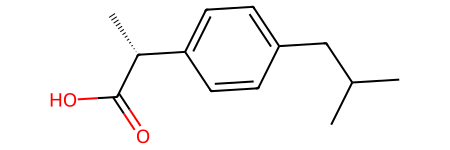

In [9]:
print(f"SMILES:\t{total.SMILES[100]}\nLogBB:\t{total.logBB[100]}")
molecule = molecule_from_smiles(total.iloc[100].SMILES)
print("Molecule:")
molecule

In [10]:
graph = graph_from_molecule(molecule)
print("Graph (including self-loops):")
print("\tatom features\t", graph[0].shape)
print("\tbond features\t", graph[1].shape)
print("\tpair indices\t", graph[2].shape)

Graph (including self-loops):
	atom features	 (15, 29)
	bond features	 (45, 7)
	pair indices	 (45, 2)


In [11]:
def prepare_batch(x_batch, y_batch):
    """Merges (sub)graphs of batch into a single global (disconnected) graph
    """

    atom_features, bond_features, pair_indices = x_batch

    # Obtain number of atoms and bonds for each graph (molecule)
    num_atoms = atom_features.row_lengths()
    num_bonds = bond_features.row_lengths()

    # Obtain partition indices (molecule_indicator), which will be used to
    # gather (sub)graphs from global graph in model later on
    molecule_indices = tf.range(len(num_atoms))
    molecule_indicator = tf.repeat(molecule_indices, num_atoms)

    # Merge (sub)graphs into a global (disconnected) graph. Adding 'increment' to
    # 'pair_indices' (and merging ragged tensors) actualizes the global graph
    gather_indices = tf.repeat(molecule_indices[:-1], num_bonds[1:])
    increment = tf.cumsum(num_atoms[:-1])
    increment = tf.pad(tf.gather(increment, gather_indices), [(num_bonds[0], 0)])
    pair_indices = pair_indices.merge_dims(outer_axis=0, inner_axis=1).to_tensor()
    pair_indices = pair_indices + increment[:, tf.newaxis]
    atom_features = atom_features.merge_dims(outer_axis=0, inner_axis=1).to_tensor()
    bond_features = bond_features.merge_dims(outer_axis=0, inner_axis=1).to_tensor()

    return (atom_features, bond_features, pair_indices, molecule_indicator), y_batch


def MPNNDataset(X, y, batch_size=32, shuffle=False):
    dataset = tf.data.Dataset.from_tensor_slices((X, (y)))
    if shuffle:
        dataset = dataset.shuffle(1024)
    return dataset.batch(batch_size).map(prepare_batch, -1).prefetch(-1)

In [12]:
class EdgeNetwork(layers.Layer):
    def build(self, input_shape):
        self.atom_dim = input_shape[0][-1]
        self.bond_dim = input_shape[1][-1]
        self.kernel = self.add_weight(
            shape=(self.bond_dim, self.atom_dim * self.atom_dim),
            initializer="glorot_uniform",
            name="kernel",
        )
        self.bias = self.add_weight(
            shape=(self.atom_dim * self.atom_dim), initializer="zeros", name="bias",
        )
        self.built = True

    def call(self, inputs):
        atom_features, bond_features, pair_indices = inputs

        # Apply linear transformation to bond features
        bond_features = tf.matmul(bond_features, self.kernel) + self.bias

        # Reshape for neighborhood aggregation later
        bond_features = tf.reshape(bond_features, (-1, self.atom_dim, self.atom_dim))

        # Obtain atom features of neighbors
        atom_features_neighbors = tf.gather(atom_features, pair_indices[:, 1])
        atom_features_neighbors = tf.expand_dims(atom_features_neighbors, axis=-1)

        # Apply neighborhood aggregation
        transformed_features = tf.matmul(bond_features, atom_features_neighbors)
        transformed_features = tf.squeeze(transformed_features, axis=-1)
        aggregated_features = tf.math.unsorted_segment_sum(
            transformed_features,
            pair_indices[:, 0],
            num_segments=tf.shape(atom_features)[0],
        )
        return aggregated_features


class MessagePassing(layers.Layer):
    def __init__(self, units, steps=4, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.steps = steps

    def build(self, input_shape):
        self.atom_dim = input_shape[0][-1]
        self.message_step = EdgeNetwork()
        self.pad_length = max(0, self.units - self.atom_dim)
        self.update_step = layers.GRUCell(self.atom_dim + self.pad_length)
        self.built = True

    def call(self, inputs):
        atom_features, bond_features, pair_indices = inputs

        # Pad atom features if number of desired units exceeds atom_features dim.
        # Alternatively, a dense layer could be used here.
        atom_features_updated = tf.pad(atom_features, [(0, 0), (0, self.pad_length)])

        # Perform a number of steps of message passing
        for i in range(self.steps):
            # Aggregate information from neighbors
            atom_features_aggregated = self.message_step(
                [atom_features_updated, bond_features, pair_indices]
            )

            # Update node state via a step of GRU
            atom_features_updated, _ = self.update_step(
                atom_features_aggregated, atom_features_updated
            )
        return atom_features_updated


In [13]:
class PartitionPadding(layers.Layer):
    def __init__(self, batch_size, **kwargs):
        super().__init__(**kwargs)
        self.batch_size = batch_size

    def call(self, inputs):

        atom_features, molecule_indicator = inputs

        # Obtain subgraphs
        atom_features_partitioned = tf.dynamic_partition(
            atom_features, molecule_indicator, self.batch_size
        )

        # Pad and stack subgraphs
        num_atoms = [tf.shape(f)[0] for f in atom_features_partitioned]
        max_num_atoms = tf.reduce_max(num_atoms)
        atom_features_stacked = tf.stack(
            [
                tf.pad(f, [(0, max_num_atoms - n), (0, 0)])
                for f, n in zip(atom_features_partitioned, num_atoms)
            ],
            axis=0,
        )

        # Remove empty subgraphs (usually for last batch in dataset)
        gather_indices = tf.where(tf.reduce_sum(atom_features_stacked, (1, 2)) != 0)
        gather_indices = tf.squeeze(gather_indices, axis=-1)
        return tf.gather(atom_features_stacked, gather_indices, axis=0)


class TransformerEncoderReadout(layers.Layer):
    def __init__(
        self, num_heads=8, embed_dim=64, dense_dim=512, batch_size=32, **kwargs
    ):
        super().__init__(**kwargs)

        self.partition_padding = PartitionPadding(batch_size)
        self.attention = layers.MultiHeadAttention(num_heads, embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.average_pooling = layers.GlobalAveragePooling1D()

    def call(self, inputs):
        x = self.partition_padding(inputs)
        padding_mask = tf.reduce_any(tf.not_equal(x, 0.0), axis=-1)
        padding_mask = padding_mask[:, tf.newaxis, tf.newaxis, :]
        attention_output = self.attention(x, x, attention_mask=padding_mask)
        proj_input = self.layernorm_1(x + attention_output)
        proj_output = self.layernorm_2(proj_input + self.dense_proj(proj_input))
        return self.average_pooling(proj_output)

In [25]:
import tensorflow as tf
from tensorflow.keras import backend as K

class CustomLossFunction(tf.keras.losses.Loss):
    def __init__(self, alpha=0.5, beta=0.3, gamma=0.2, lambda_l2=0.01, lambda_l1=0.01):
        super(CustomLossFunction, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.lambda_l2 = lambda_l2
        self.lambda_l1 = lambda_l1

    def call(self, y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred), axis=-1)
        mae = K.mean(K.abs(y_true - y_pred), axis=-1)
        huber_loss = tf.keras.losses.Huber(delta=1.0)(y_true, y_pred)

        l2_norm = tf.reduce_sum(tf.square(y_pred))
        l1_norm = tf.reduce_sum(tf.abs(y_pred))

        combined_loss = (self.alpha * mse + self.beta * mae + self.gamma * huber_loss +
                         self.lambda_l2 * l2_norm + self.lambda_l1 * l1_norm)
        return combined_loss

custom_loss_function = CustomLossFunction()


In [37]:
permuted_indices = np.random.permutation(np.arange(total.shape[0]))

# Train set: 80 % of data
train_index = permuted_indices[: int(total.shape[0] * 0.7)]
x_train = graphs_from_smiles(total.iloc[train_index].SMILES)
y_train = total.iloc[train_index].logBB

# Valid set: 20 % of data
valid_index = permuted_indices[int(total.shape[0] * 0.7) : ]
x_valid = graphs_from_smiles(total.iloc[valid_index].SMILES)
y_valid = total.iloc[valid_index].logBB

train_dataset = MPNNDataset(x_train, y_train)
valid_dataset = MPNNDataset(x_valid, y_valid)

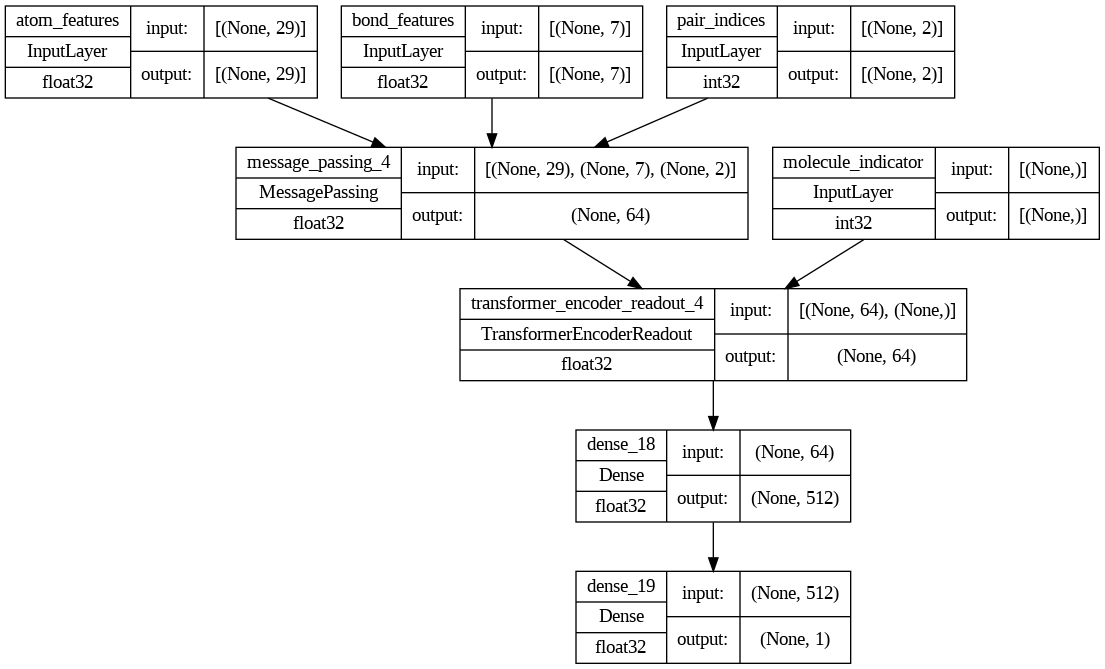

In [38]:
def MPNNModel(
    atom_dim,
    bond_dim,
    batch_size=32,
    message_units=64,
    message_steps=4,
    num_attention_heads=8,
    dense_units=512,
):

    atom_features = layers.Input((atom_dim), dtype="float32", name="atom_features")
    bond_features = layers.Input((bond_dim), dtype="float32", name="bond_features")
    pair_indices = layers.Input((2), dtype="int32", name="pair_indices")
    molecule_indicator = layers.Input((), dtype="int32", name="molecule_indicator")

    x = MessagePassing(message_units, message_steps)(
        [atom_features, bond_features, pair_indices]
    )

    x = TransformerEncoderReadout(
        num_attention_heads, message_units, dense_units, batch_size
    )([x, molecule_indicator])

    x = layers.Dense(dense_units, activation="relu")(x)
    x = layers.Dense(1)(x)

    model = keras.Model(
        inputs=[atom_features, bond_features, pair_indices, molecule_indicator],
        outputs=[x],
    )
    return model


mpnn = MPNNModel(
    atom_dim=x_train[0][0][0].shape[0], bond_dim=x_train[1][0][0].shape[0],
)

mpnn.compile(
    loss=custom_loss_function,
    optimizer=keras.optimizers.Adam(learning_rate=5e-4),
    metrics=[keras.metrics.MeanAbsoluteError(name="MAE")],
)

keras.utils.plot_model(mpnn, show_dtype=True, show_shapes=True)

In [39]:
from tensorflow.keras import layers, models

def MPNNModel(
    atom_dim,
    bond_dim,
    batch_size=32,
    message_units=64,
    message_steps=4,
    num_attention_heads=8,
    dense_units=512,
):

    atom_features = layers.Input((atom_dim), dtype="float32", name="atom_features")
    bond_features = layers.Input((bond_dim), dtype="float32", name="bond_features")
    pair_indices = layers.Input((2), dtype="int32", name="pair_indices")
    molecule_indicator = layers.Input((), dtype="int32", name="molecule_indicator")

    x = MessagePassing(message_units, message_steps)(
        [atom_features, bond_features, pair_indices]
    )

    x = TransformerEncoderReadout(
        num_attention_heads, message_units, dense_units, batch_size
    )([x, molecule_indicator])

    x = layers.Dense(dense_units, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(dense_units, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(1)(x)

    model = models.Model(
        inputs=[atom_features, bond_features, pair_indices, molecule_indicator],
        outputs=[x],
    )
    return model


In [40]:
import tensorflow as tf
from tensorflow.keras import backend as K

class CustomLossFunction(tf.keras.losses.Loss):
    def __init__(self, alpha=0.5, beta=0.3, gamma=0.2, lambda_l2=0.01, lambda_l1=0.01):
        super(CustomLossFunction, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.lambda_l2 = lambda_l2
        self.lambda_l1 = lambda_l1

    def call(self, y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred), axis=-1)
        mae = K.mean(K.abs(y_true - y_pred), axis=-1)
        huber_loss = tf.keras.losses.Huber(delta=1.0)(y_true, y_pred)

        l2_norm = tf.reduce_sum(tf.square(y_pred))
        l1_norm = tf.reduce_sum(tf.abs(y_pred))

        combined_loss = (self.alpha * mse + self.beta * mae + self.gamma * huber_loss +
                         self.lambda_l2 * l2_norm + self.lambda_l1 * l1_norm)
        return combined_loss

custom_loss_function = CustomLossFunction()

# Implement learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Improved optimizer
optimizer = tf.keras.optimizers.AdamW(learning_rate=5e-4)

# Compile the model
mpnn.compile(
    loss=custom_loss_function,
    optimizer=optimizer,
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="MAE"), tf.keras.metrics.MeanSquaredError(name="MSE")]
)



from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model with the callbacks
history = mpnn.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=100,
    batch_size=32,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/100
24/24 [==============================] - 21s 571ms/step - loss: 0.6743 - MAE: 0.6194 - MSE: 0.6291 - val_loss: 0.5409 - val_MAE: 0.5892 - val_MSE: 0.5799 - lr: 5.0000e-04
Epoch 2/100
24/24 [==============================] - 14s 597ms/step - loss: 0.5272 - MAE: 0.5707 - MSE: 0.5239 - val_loss: 0.5230 - val_MAE: 0.5724 - val_MSE: 0.5365 - lr: 5.0000e-04
Epoch 3/100
24/24 [==============================] - 13s 523ms/step - loss: 0.4977 - MAE: 0.5478 - MSE: 0.4828 - val_loss: 0.5042 - val_MAE: 0.5462 - val_MSE: 0.4850 - lr: 5.0000e-04
Epoch 4/100
24/24 [==============================] - 11s 473ms/step - loss: 0.4821 - MAE: 0.5253 - MSE: 0.4446 - val_loss: 0.4961 - val_MAE: 0.5390 - val_MSE: 0.4703 - lr: 5.0000e-04
Epoch 5/100
24/24 [==============================] - 14s 572ms/step - loss: 0.4823 - MAE: 0.5226 - MSE: 0.4412 - val_loss: 0.5000 - val_MAE: 0.5310 - val_MSE: 0.4550 - lr: 5.0000e-04
Epoch 6/100
24/24 [==============================] - 12s 478ms/step - loss: 0.4773 - 

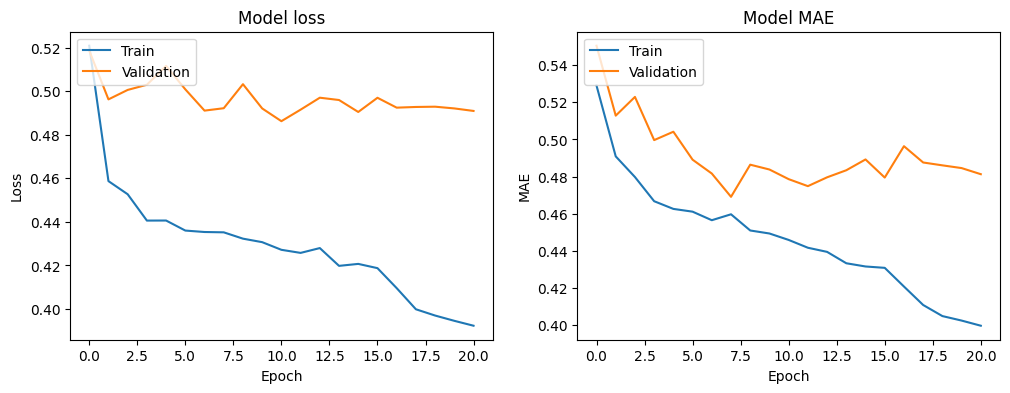

In [34]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [29]:
class DynamicLossWeightingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Adjust the weights dynamically based on epoch or logs
        if epoch % 10 == 0:  # Example condition
            self.model.loss.alpha = max(0.1, self.model.loss.alpha * 0.9)
            self.model.loss.beta = min(0.5, self.model.loss.beta * 1.1)
            self.model.loss.gamma = min(0.5, self.model.loss.gamma * 1.05)
            print(f"Adjusted loss weights: alpha={self.model.loss.alpha}, beta={self.model.loss.beta}, gamma={self.model.loss.gamma}")

# Training the model with the custom callback
mpnn.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=100,
    batch_size=32,
    callbacks=[DynamicLossWeightingCallback(), tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)


Epoch 1/100
27/27 [==============================] - 64s 669ms/step - loss: 0.6530 - MAE: 0.6217 - val_loss: 0.5588 - val_MAE: 0.6056
Epoch 2/100
27/27 [==============================] - 14s 528ms/step - loss: 0.4934 - MAE: 0.5473 - val_loss: 0.5324 - val_MAE: 0.5698
Epoch 3/100
27/27 [==============================] - 14s 517ms/step - loss: 0.4776 - MAE: 0.5244 - val_loss: 0.5287 - val_MAE: 0.5595
Epoch 4/100
27/27 [==============================] - 13s 470ms/step - loss: 0.4769 - MAE: 0.5159 - val_loss: 0.5172 - val_MAE: 0.5478
Epoch 5/100
27/27 [==============================] - 14s 532ms/step - loss: 0.4626 - MAE: 0.5027 - val_loss: 0.5127 - val_MAE: 0.5403
Epoch 6/100
27/27 [==============================] - 14s 504ms/step - loss: 0.4691 - MAE: 0.5013 - val_loss: 0.5151 - val_MAE: 0.5551
Epoch 7/100
27/27 [==============================] - 13s 490ms/step - loss: 0.4575 - MAE: 0.4944 - val_loss: 0.5001 - val_MAE: 0.5269
Epoch 8/100
27/27 [==============================] - 14s 522ms

In [ ]:
# permuted_indices = np.random.permutation(np.arange(total.shape[0]))

# # Train set: 80 % of data
# train_index = permuted_indices[: int(total.shape[0] * 0.7)]
# x_train = graphs_from_smiles(total.iloc[train_index].SMILES)
# y_train = total.iloc[train_index].logBB

# # Valid set: 10 % of data
# valid_index = permuted_indices[int(total.shape[0] * 0.7) : ]
# x_valid = graphs_from_smiles(total.iloc[valid_index].SMILES)
# y_valid = total.iloc[valid_index].logBB

# # Valid set: 10 % of data
# # test_index = permuted_indices[int(total.shape[0] * 0.9) : ]
# # x_test = graphs_from_smiles(total.iloc[test_index].SMILES)
# # y_test= total.iloc[valid_index].logBB

# # train_dataset = MPNNDataset(x_train, y_train)
# # valid_dataset = MPNNDataset(x_valid, y_valid)
# # test_dataset = MPNNDataset(x_test, y_test)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# TEST 1:

TEST 1
Epoch 1/40
27/27 - 60s - loss: 0.5620 - MAE: 0.6283 - val_loss: 0.3876 - val_MAE: 0.4972 - 60s/epoch - 2s/step
Epoch 2/40
27/27 - 15s - loss: 0.4569 - MAE: 0.5514 - val_loss: 0.3614 - val_MAE: 0.4789 - 15s/epoch - 560ms/step
Epoch 3/40
27/27 - 14s - loss: 0.4265 - MAE: 0.5302 - val_loss: 0.3782 - val_MAE: 0.5060 - 14s/epoch - 514ms/step
Epoch 4/40
27/27 - 14s - loss: 0.3848 - MAE: 0.4935 - val_loss: 0.3382 - val_MAE: 0.4691 - 14s/epoch - 516ms/step
Epoch 5/40
27/27 - 16s - loss: 0.3636 - MAE: 0.4754 - val_loss: 0.3154 - val_MAE: 0.4412 - 16s/epoch - 583ms/step
Epoch 6/40
27/27 - 15s - loss: 0.3509 - MAE: 0.4617 - val_loss: 0.3137 - val_MAE: 0.4391 - 15s/epoch - 557ms/step
Epoch 7/40
27/27 - 13s - loss: 0.3458 - MAE: 0.4582 - val_loss: 0.3083 - val_MAE: 0.4336 - 13s/epoch - 471ms/step
Epoch 8/40
27/27 - 14s - loss: 0.3361 - MAE: 0.4497 - val_loss: 0.3154 - val_MAE: 0.4371 - 14s/epoch - 536ms/step
Epoch 9/40
27/27 - 14s - loss: 0.3324 - MAE: 0.4483 - val_loss: 0.3083 - val_MAE: 0.

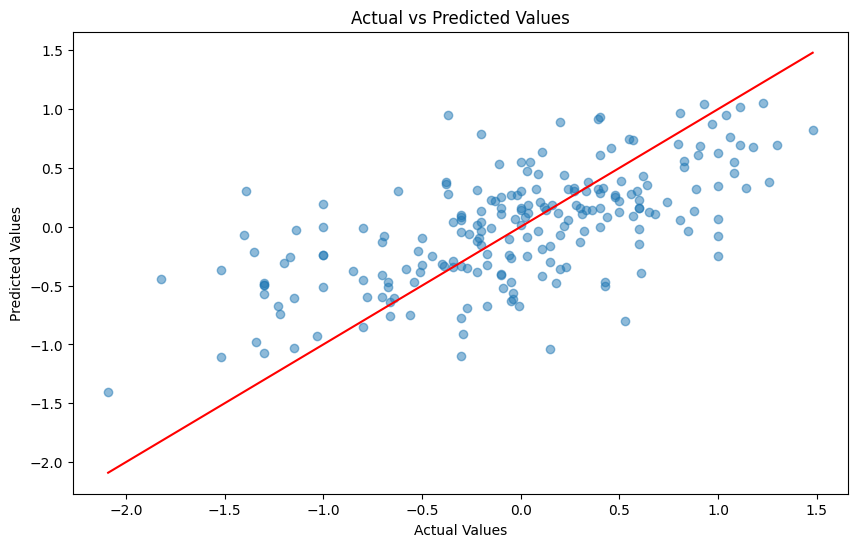

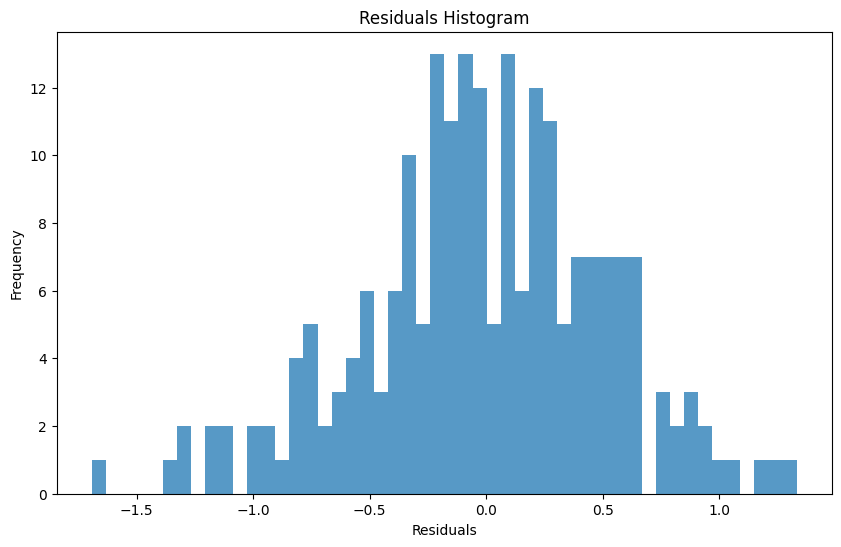

TEST 2
Epoch 1/40
27/27 - 14s - loss: 0.3250 - MAE: 0.4406 - val_loss: 0.3461 - val_MAE: 0.4449 - 14s/epoch - 535ms/step
Epoch 2/40
27/27 - 14s - loss: 0.3174 - MAE: 0.4324 - val_loss: 0.3166 - val_MAE: 0.4200 - 14s/epoch - 522ms/step
Epoch 3/40
27/27 - 14s - loss: 0.2964 - MAE: 0.4130 - val_loss: 0.3093 - val_MAE: 0.4199 - 14s/epoch - 536ms/step
Epoch 4/40
27/27 - 15s - loss: 0.2849 - MAE: 0.3978 - val_loss: 0.3389 - val_MAE: 0.4386 - 15s/epoch - 550ms/step
Epoch 5/40
27/27 - 15s - loss: 0.2759 - MAE: 0.3898 - val_loss: 0.3404 - val_MAE: 0.4378 - 15s/epoch - 544ms/step
Epoch 6/40
27/27 - 16s - loss: 0.2765 - MAE: 0.3899 - val_loss: 0.3098 - val_MAE: 0.4158 - 16s/epoch - 578ms/step
Epoch 7/40
27/27 - 17s - loss: 0.2678 - MAE: 0.3797 - val_loss: 0.3053 - val_MAE: 0.4100 - 17s/epoch - 645ms/step
Epoch 8/40
27/27 - 14s - loss: 0.2683 - MAE: 0.3796 - val_loss: 0.3077 - val_MAE: 0.4142 - 14s/epoch - 526ms/step
Epoch 9/40
27/27 - 15s - loss: 0.2641 - MAE: 0.3753 - val_loss: 0.3258 - val_MAE:

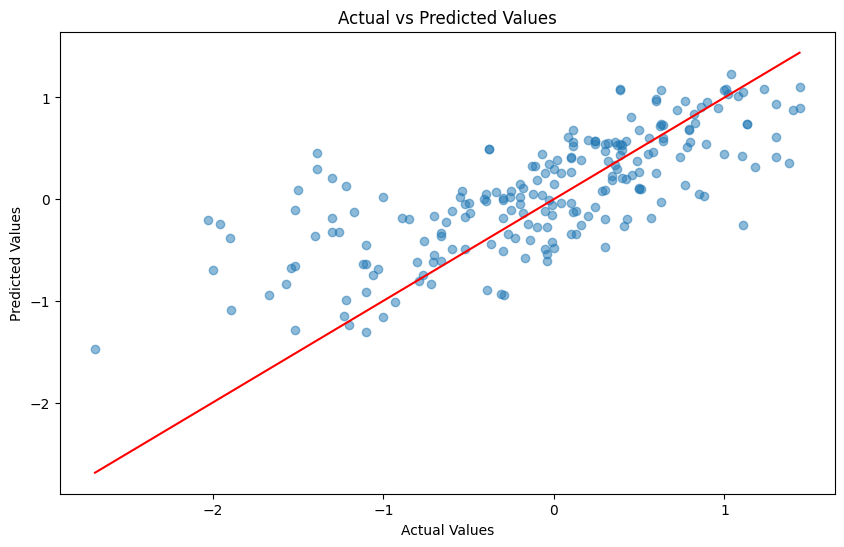

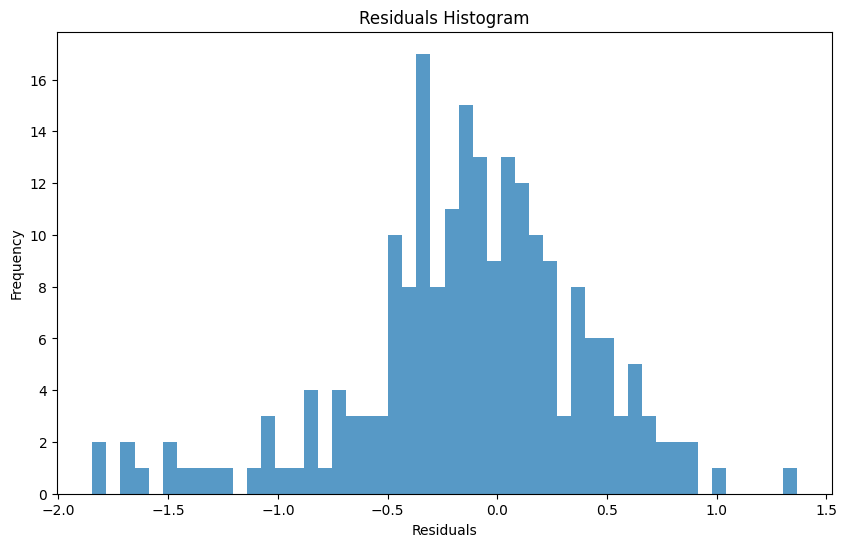

TEST 3
Epoch 1/40
27/27 - 13s - loss: 0.3244 - MAE: 0.4370 - val_loss: 0.3037 - val_MAE: 0.4204 - 13s/epoch - 490ms/step
Epoch 2/40
27/27 - 14s - loss: 0.2913 - MAE: 0.4140 - val_loss: 0.3257 - val_MAE: 0.4495 - 14s/epoch - 511ms/step
Epoch 3/40
27/27 - 12s - loss: 0.2862 - MAE: 0.4037 - val_loss: 0.2828 - val_MAE: 0.3892 - 12s/epoch - 454ms/step
Epoch 4/40
27/27 - 15s - loss: 0.2818 - MAE: 0.3981 - val_loss: 0.2732 - val_MAE: 0.3848 - 15s/epoch - 552ms/step
Epoch 5/40
27/27 - 14s - loss: 0.2708 - MAE: 0.3855 - val_loss: 0.2671 - val_MAE: 0.3720 - 14s/epoch - 506ms/step
Epoch 6/40
27/27 - 14s - loss: 0.2623 - MAE: 0.3789 - val_loss: 0.2692 - val_MAE: 0.3685 - 14s/epoch - 517ms/step
Epoch 7/40
27/27 - 14s - loss: 0.2537 - MAE: 0.3667 - val_loss: 0.2610 - val_MAE: 0.3615 - 14s/epoch - 533ms/step
Epoch 8/40
27/27 - 16s - loss: 0.2524 - MAE: 0.3670 - val_loss: 0.2680 - val_MAE: 0.3688 - 16s/epoch - 584ms/step
Epoch 9/40
27/27 - 15s - loss: 0.2566 - MAE: 0.3697 - val_loss: 0.2616 - val_MAE:

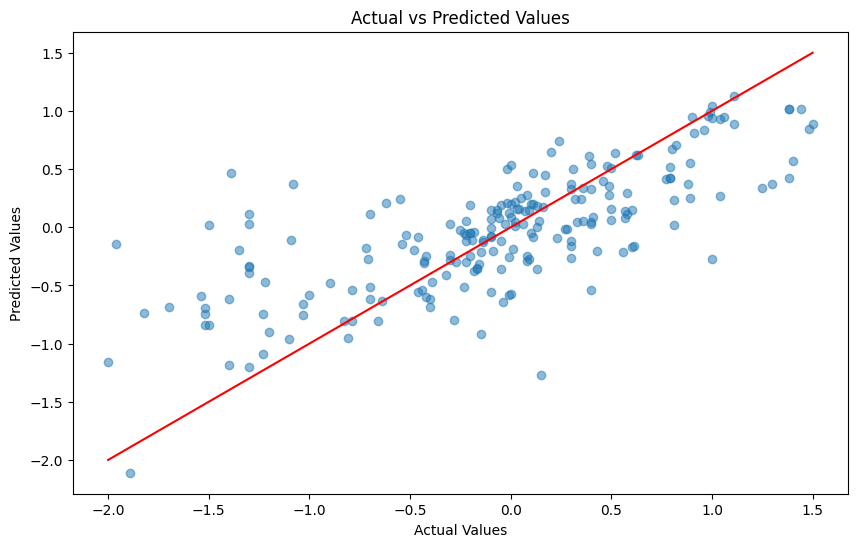

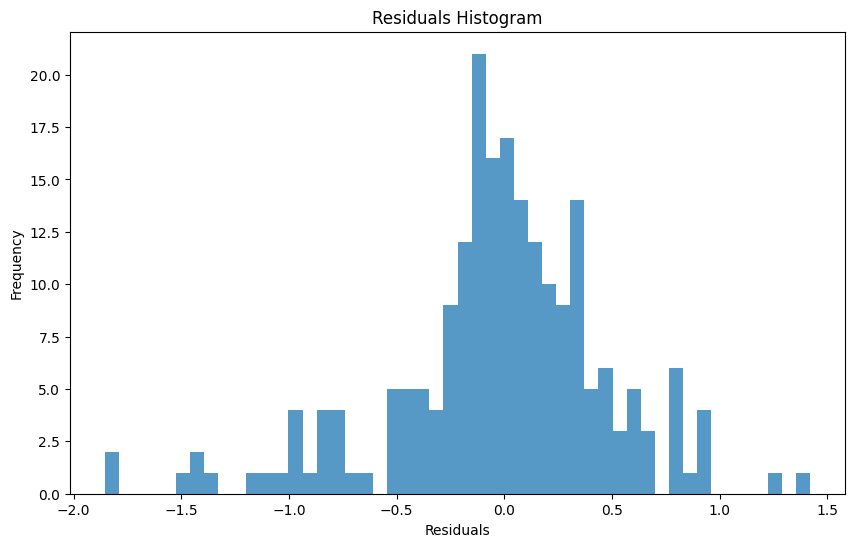

TEST 4
Epoch 1/40
27/27 - 13s - loss: 0.2781 - MAE: 0.3850 - val_loss: 0.2506 - val_MAE: 0.3788 - 13s/epoch - 474ms/step
Epoch 2/40
27/27 - 14s - loss: 0.2691 - MAE: 0.3791 - val_loss: 0.2693 - val_MAE: 0.3984 - 14s/epoch - 529ms/step
Epoch 3/40
27/27 - 13s - loss: 0.2616 - MAE: 0.3742 - val_loss: 0.2765 - val_MAE: 0.4107 - 13s/epoch - 475ms/step
Epoch 4/40
27/27 - 14s - loss: 0.2492 - MAE: 0.3608 - val_loss: 0.2638 - val_MAE: 0.3951 - 14s/epoch - 502ms/step
Epoch 5/40
27/27 - 14s - loss: 0.2528 - MAE: 0.3678 - val_loss: 0.2753 - val_MAE: 0.4082 - 14s/epoch - 510ms/step
Epoch 6/40
27/27 - 13s - loss: 0.2478 - MAE: 0.3615 - val_loss: 0.2667 - val_MAE: 0.3987 - 13s/epoch - 474ms/step
27/27 [==============================] - 4s 139ms/step - loss: 0.2412 - MAE: 0.3518
Train MAE: 0.35184407234191895
Training R-squared: 0.601650354090283
7/7 [==============================] - 1s 179ms/step
<IPython.core.display.Image object>
7/7 [==============================] - 1s 166ms/step - loss: 0.2506

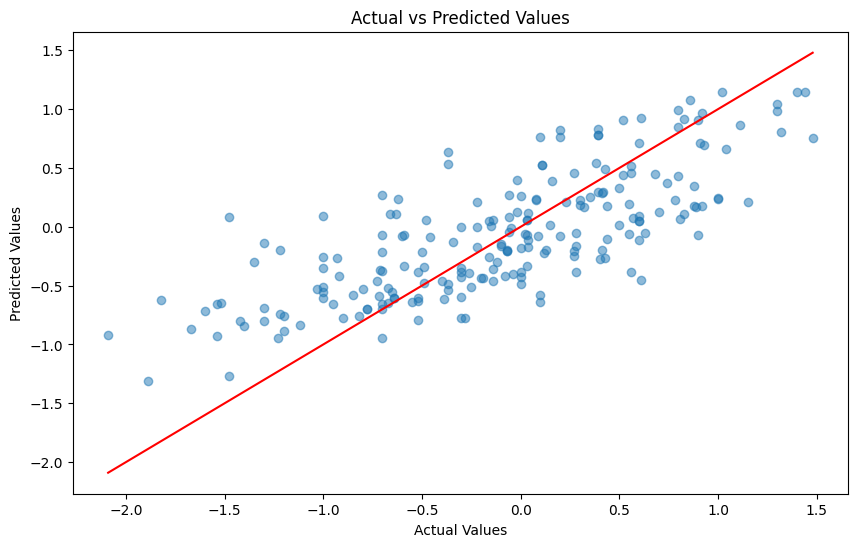

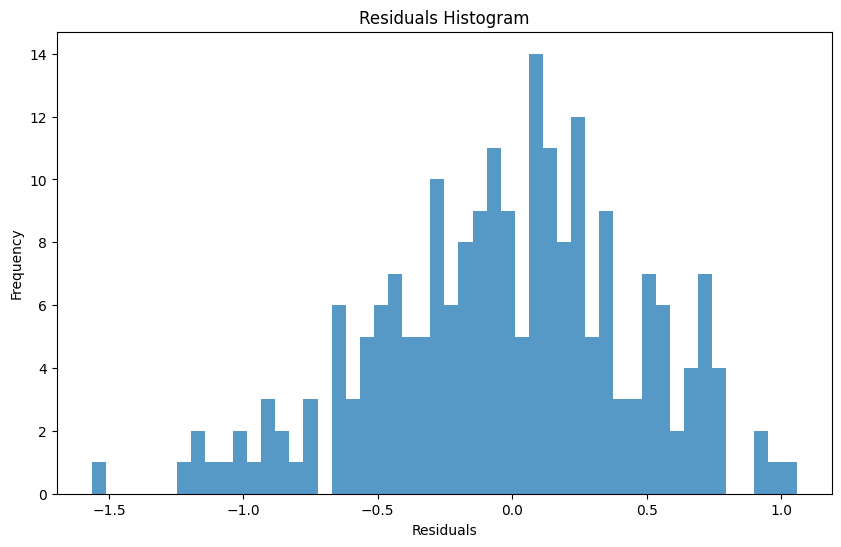

TEST 5
Epoch 1/40
27/27 - 16s - loss: 0.2702 - MAE: 0.3806 - val_loss: 0.2802 - val_MAE: 0.4032 - 16s/epoch - 599ms/step
Epoch 2/40
27/27 - 15s - loss: 0.2532 - MAE: 0.3624 - val_loss: 0.2663 - val_MAE: 0.3783 - 15s/epoch - 539ms/step
Epoch 3/40
27/27 - 14s - loss: 0.2430 - MAE: 0.3528 - val_loss: 0.2720 - val_MAE: 0.3873 - 14s/epoch - 528ms/step
Epoch 4/40
27/27 - 14s - loss: 0.2377 - MAE: 0.3467 - val_loss: 0.2564 - val_MAE: 0.3794 - 14s/epoch - 517ms/step
Epoch 5/40
27/27 - 14s - loss: 0.2250 - MAE: 0.3326 - val_loss: 0.2830 - val_MAE: 0.4060 - 14s/epoch - 526ms/step
Epoch 6/40
27/27 - 14s - loss: 0.2190 - MAE: 0.3269 - val_loss: 0.2920 - val_MAE: 0.4093 - 14s/epoch - 529ms/step
Epoch 7/40
27/27 - 14s - loss: 0.2165 - MAE: 0.3255 - val_loss: 0.2790 - val_MAE: 0.3918 - 14s/epoch - 512ms/step
Epoch 8/40
27/27 - 15s - loss: 0.2169 - MAE: 0.3275 - val_loss: 0.2749 - val_MAE: 0.3880 - 15s/epoch - 538ms/step
Epoch 9/40
27/27 - 15s - loss: 0.2139 - MAE: 0.3215 - val_loss: 0.3038 - val_MAE:

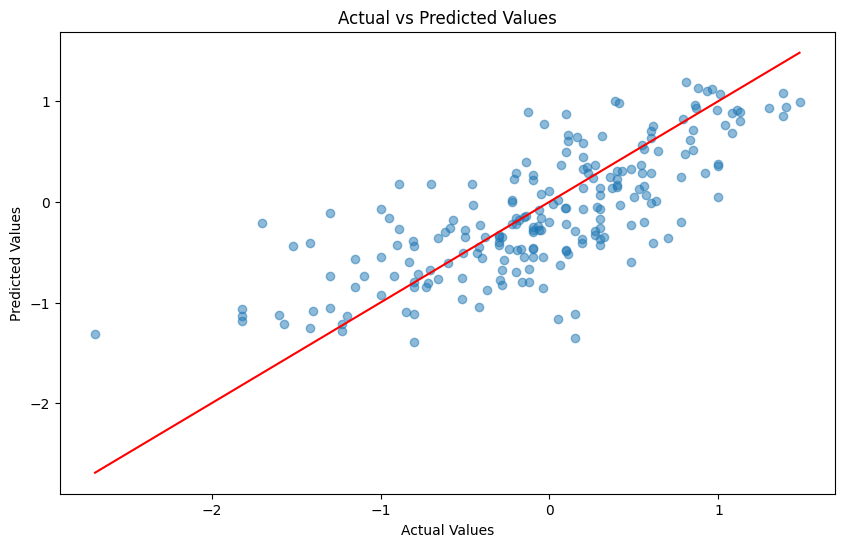

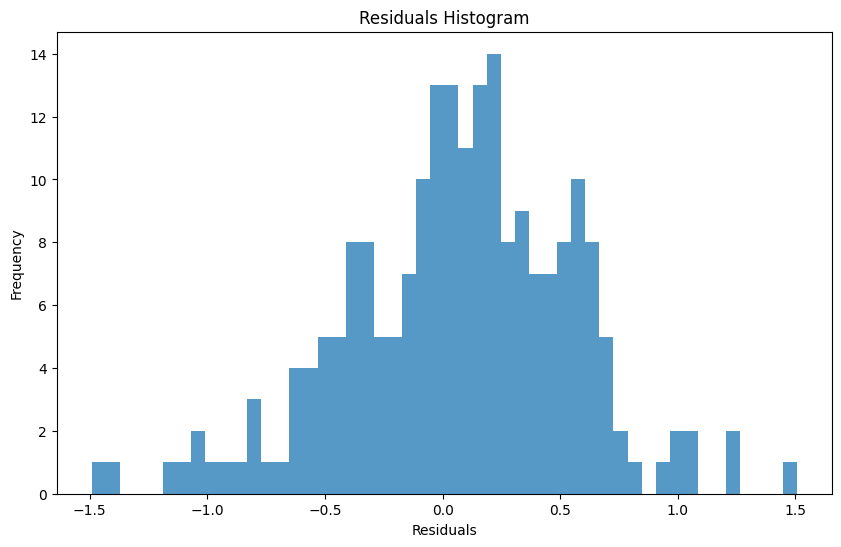

In [24]:
for i in range(5):
  print("TEST",i+1)
  permuted_indices = np.random.permutation(np.arange(total.shape[0]))

  # Train set: 80 % of data
  train_index = permuted_indices[: int(total.shape[0] * 0.8)]
  x_train = graphs_from_smiles(total.iloc[train_index].SMILES)
  y_train = total.iloc[train_index].logBB

  # Valid set: 20 % of data
  valid_index = permuted_indices[int(total.shape[0] * 0.8) : ]
  x_valid = graphs_from_smiles(total.iloc[valid_index].SMILES)
  y_valid = total.iloc[valid_index].logBB

  train_dataset = MPNNDataset(x_train, y_train)
  valid_dataset = MPNNDataset(x_valid, y_valid)

  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

  history = mpnn.fit(
      train_dataset,
      validation_data=valid_dataset,
      epochs=40,
      verbose=2,
      callbacks=[early_stopping]
  )

  train_predictions = mpnn.predict(train_dataset)
  train_loss, train_mae = mpnn.evaluate(train_dataset)
  print(f"Train MAE: {train_mae}")

  r2_train = r2_score(y_train, train_predictions)
  print(f"Training R-squared: {r2_train}")

  molecules = [molecule_from_smiles(total.SMILES.values[index]) for index in valid_index]
  y_true = [total.logBB.values[index] for index in valid_index]
  y_pred = tf.squeeze(mpnn.predict(valid_dataset), axis=1)

  legends = [f"y_true/y_pred = {y_true[i]}/{y_pred[i]:.2f}" for i in range(len(y_true))]
  print(MolsToGridImage(molecules, molsPerRow=4, legends=legends))

  valid_dataset = MPNNDataset(x_valid, y_valid)
  test_loss, test_mae = mpnn.evaluate(valid_dataset)
  print(f"Test Loss: {test_loss}")
  print(f"Test MAE: {test_mae}")

  predictions = mpnn.predict(valid_dataset)
  r2 = r2_score(y_valid, predictions)
  print(f"R^2 Score: {r2}")

  # Load the test dataset and make predictions
  test_dataset = MPNNDataset(x_valid, y_valid)
  y_pred = mpnn.predict(valid_dataset)

  # Ensure y_test and y_pred are numpy arrays
  y_test = np.array(y_valid)
  y_pred = np.array(y_pred).squeeze()  # Remove the extra dimension if it exists

  # Check the shape of y_test and y_pred
  print(f"Shape of y_test: {y_test.shape}")
  print(f"Shape of y_pred: {y_pred.shape}")

  # Calculate metrics
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)

  print(f"Mean Absolute Error (MAE): {mae}")
  print(f"Mean Squared Error (MSE): {mse}")

  # Plot actual vs predicted values
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Actual vs Predicted Values')
  plt.show()

  # Plot residuals (errors)
  residuals = y_test - y_pred
  plt.figure(figsize=(10, 6))
  plt.hist(residuals, bins=50, alpha=0.75)
  plt.xlabel('Residuals')
  plt.ylabel('Frequency')
  plt.title('Residuals Histogram')
  plt.show()



In [ ]:
train_mae_1 = 0.3681027293205261
train_mae_2 =  0.3801739811897278
train_mae_3 =  0.3509064316749573
train_mae_4 =  0.35697364807128906
train_mae_5 =   0.34556013345718384

train_rs_1 =  0.5771098965563924
train_rs_2 =  0.548814229173701
train_rs_3 =  0.6206559199907495
train_rs_4 =  0.6116671768105166
train_rs_5 = 0.607733472446852

test_mae_1 =  0.3672944903373718
test_mae_2 =  0.34905168414115906
test_mae_3 =  0.3552539646625519
test_mae_4 =  0.35783374309539795
test_mae_5 =  0.35590916872024536

test_rs_1 =   0.5292578539893419
test_rs_2 =  0.5774781139621592
test_rs_3 =   0.5038189662411161
test_rs_4 =   0.5338849547566491
test_rs_5 =    0.6097871464366199



In [ ]:
train_mae=[train_mae_1, train_mae_2, train_mae_3, train_mae_4, train_mae_5]
train_rs=[train_rs_1, train_rs_2, train_rs_3, train_rs_4, train_rs_5]
test_mae=[test_mae_1, test_mae_2, test_mae_3, test_mae_4, test_mae_5]
test_rs=[test_rs_1, test_rs_2, test_rs_3, test_rs_4, test_rs_5]
train_mae_sum=0
train_rs_sum=0
test_mae_sum=0
test_rs_sum=0
for i in range(5):
  train_mae_sum+=train_mae[i]
  train_rs_sum+=train_rs[i]
  test_mae_sum+=test_mae[i]
  test_rs_sum+=test_rs[i]
print("mean of train mae:",train_mae_sum/5)
print("mean of train rs:",train_rs_sum/5)
print("mean of test mae:",test_mae_sum/5)
print("mean of test rs:",test_rs_sum/5)

mean of train mae: 0.3603433847427368
mean of train rs: 0.5931961389956423
mean of test mae: 0.3570686101913452
mean of test rs: 0.5508454070771773


In [ ]:
import numpy as np
import scipy.stats as stats

mae_values = np.array(train_mae)
r2_values = np.array(train_rs)

def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    t_score = stats.t.ppf((1 + confidence) / 2.0, n - 1)
    margin_of_error = t_score * std_err
    return mean - margin_of_error, mean + margin_of_error


mae_conf_interval = calculate_confidence_interval(mae_values)
print(f"95% Confidence Interval for MAE: {mae_conf_interval}")


r2_conf_interval = calculate_confidence_interval(r2_values)
print(f"95% Confidence Interval for R-squared: {r2_conf_interval}")


95% Confidence Interval for MAE: (0.3430889934504147, 0.3775977760350589)
95% Confidence Interval for R-squared: (0.5562836485652406, 0.630108629426044)


In [ ]:
import numpy as np
import scipy.stats as stats

mae_values = np.array(test_mae)
r2_values = np.array(test_rs)

def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    t_score = stats.t.ppf((1 + confidence) / 2.0, n - 1)
    margin_of_error = t_score * std_err
    return mean - margin_of_error, mean + margin_of_error


mae_conf_interval = calculate_confidence_interval(mae_values)
print(f"95% Confidence Interval for MAE: {mae_conf_interval}")


r2_conf_interval = calculate_confidence_interval(r2_values)
print(f"95% Confidence Interval for R-squared: {r2_conf_interval}")


95% Confidence Interval for MAE: (0.34887780538980306, 0.3652594149928874)
95% Confidence Interval for R-squared: (0.4983544553343303, 0.6033363588200243)
